In [29]:
import os
import requests
import numpy as np
import cv2
from cv2 import imread
import matplotlib
import matplotlib.pyplot as plt
#from google.colab.patches import
import wget

In [30]:
url_imagen = "https://raw.githubusercontent.com/joseramoniglesias/Tratamiento_Senales/main/clases/Cap01_Introducci%C3%B3n/Matlab/mandril.png"
nombre_local_imagen = "mandril.png" # El nombre con el que queremos guardarla
imagen = requests.get(url_imagen).content
with open(nombre_local_imagen, 'wb') as handler:
  handler.write(imagen)
url_imagen = "https://github.com/joseramoniglesias/Tratamiento_Senales/blob/main/clases/Cap01_Introducci%C3%B3n/Matlab/scale.png"
nombre_local_imagen = "scale.png"  # El nombre con el que queremos guardarla
imagen = requests.get(url_imagen).content
with open(nombre_local_imagen, 'wb') as handler:
  handler.write(imagen)

In [31]:
def howis(img):
  print('size = ',img.shape)
  print('max  = ',np.max(img))
  print('min  = ',np.min(img))

In [32]:
st_img = 'mandril.png'
#st_img = 'scale.png'

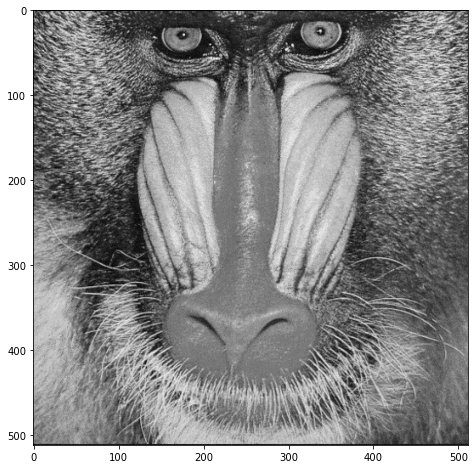

size =  (512, 512)
max  =  255
min  =  0


In [36]:
img = imread(st_img)
X = img[:,:,0]
plt.figure(figsize=(8,8))
#plt.axis('off')
plt.imshow(X,cmap='gray')
plt.show()
howis(X)

# Mustreo Espacial

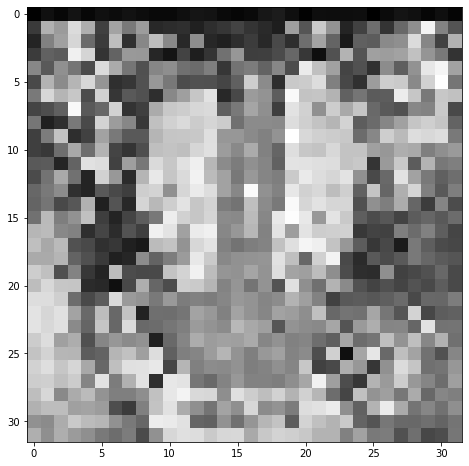

size =  (32, 32)
max  =  227
min  =  0


In [39]:
d = 16   # se muestrea cada d pixeles
(Nx,Mx) = X.shape
ix = range(0,Nx,d)
jx = range(0,Mx,d)
Ny = len(ix)
My = len(jx)
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    Y[i,j] = X[ix[i],jx[j]]
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
plt.show()
howis(Y)

size =  (512, 512)
max  =  237
min  =  0
desplegado como =  64 x 64


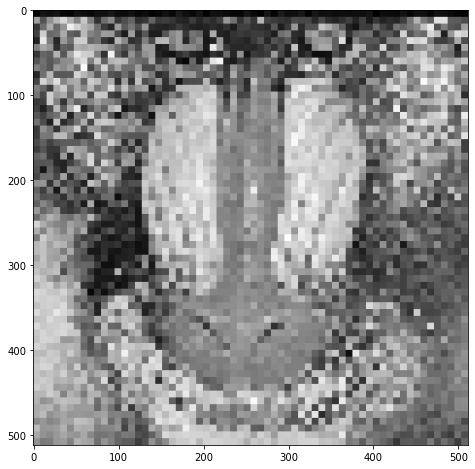

In [40]:
d = 8  # se muestrea cada d pixeles
(Nx,Mx) = X.shape
Ny = Nx
My = Mx
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    ix = int(np.fix(i/d)*d)
    jx = int(np.fix(j/d)*d)
    Y[i,j] = X[ix,jx]
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
howis(Y)
print('desplegado como = ',int(Nx/d),'x',int(Nx/d))

# Definición de histograma

In [41]:
def imhist(X,n=256):
  (N,M) = X.shape
  h = np.zeros((n,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h[x] = h[x]+1
  return h

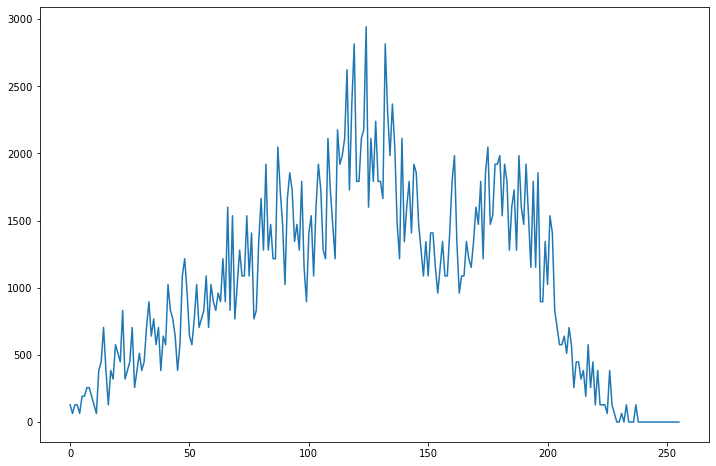

In [42]:
n = 256
h = imhist(Y,n=n)
plt.figure(figsize=(12,8))
plt.plot(range(n),h[0:n])
plt.show()

# Muestreo en tonos de gris (Cuantización)

size =  (512, 512)
max  =  252
min  =  0
esta imagen tiene =  64  tonos de gris


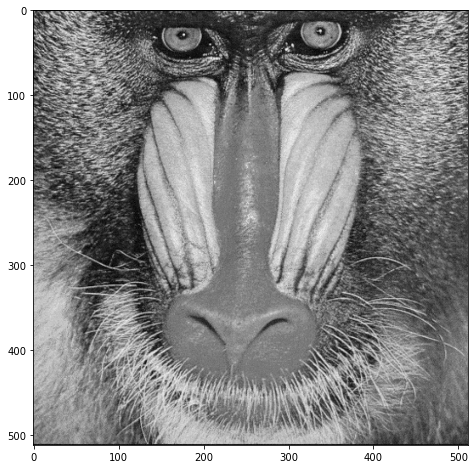

In [43]:
p = 4  # se muestrea el tono de gris cada p valores de gris
(Nx,Mx) = X.shape
Ny = Nx
My = Mx
Y = np.zeros((Ny,My),np.uint8)
for i in range(Ny):
  for j in range(My):
    x = int(np.fix(X[i,j]/p)*p)
    Y[i,j] = x
plt.figure(figsize=(8,8))
plt.imshow(Y,cmap='gray')
howis(Y)
print('esta imagen tiene = ',int(256/p),' tonos de gris')

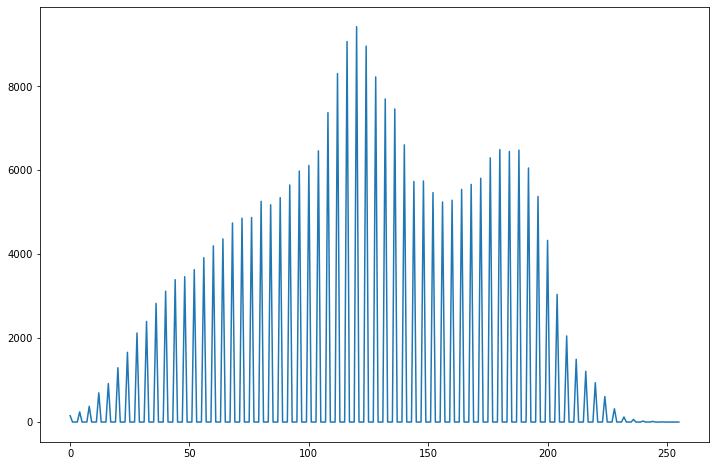

In [44]:
n = 256
h = imhist(Y,n=n)
plt.figure(figsize=(12,8))
plt.plot(range(n),h[0:n])
plt.show()

In [45]:
print(h[0:256])

[1.510e+02 0.000e+00 0.000e+00 0.000e+00 2.420e+02 0.000e+00 0.000e+00
 0.000e+00 3.750e+02 0.000e+00 0.000e+00 0.000e+00 6.960e+02 0.000e+00
 0.000e+00 0.000e+00 9.160e+02 0.000e+00 0.000e+00 0.000e+00 1.294e+03
 0.000e+00 0.000e+00 0.000e+00 1.661e+03 0.000e+00 0.000e+00 0.000e+00
 2.122e+03 0.000e+00 0.000e+00 0.000e+00 2.396e+03 0.000e+00 0.000e+00
 0.000e+00 2.827e+03 0.000e+00 0.000e+00 0.000e+00 3.118e+03 0.000e+00
 0.000e+00 0.000e+00 3.392e+03 0.000e+00 0.000e+00 0.000e+00 3.463e+03
 0.000e+00 0.000e+00 0.000e+00 3.631e+03 0.000e+00 0.000e+00 0.000e+00
 3.916e+03 0.000e+00 0.000e+00 0.000e+00 4.197e+03 0.000e+00 0.000e+00
 0.000e+00 4.364e+03 0.000e+00 0.000e+00 0.000e+00 4.743e+03 0.000e+00
 0.000e+00 0.000e+00 4.857e+03 0.000e+00 0.000e+00 0.000e+00 4.873e+03
 0.000e+00 0.000e+00 0.000e+00 5.258e+03 0.000e+00 0.000e+00 0.000e+00
 5.176e+03 0.000e+00 0.000e+00 0.000e+00 5.347e+03 0.000e+00 0.000e+00
 0.000e+00 5.648e+03 0.000e+00 0.000e+00 0.000e+00 5.980e+03 0.000e+00
 0.000

In [46]:
import matplotlib.pyplot as plt
h = np.zeros((256,))
def imhist(X):
  (N,M) = X.shape
  n = 256
  #h = np.zeros((256,))
  for i in range(N):
    for j in range(M):
      x = X[i,j]
      h = np.zeros((256,))
      h[x] = h[x]+1
  plt.plot(range(n),h[0:n])
  plt.show()


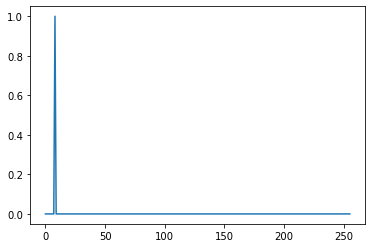

In [47]:
imhist(Y)

In [48]:
print(h[0:256])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
